<hr>
<h3>Bank Churn Prediction Project</h3>
<hr>

<b>Objective</b>:
Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not.

<b>Context</b>:

Businesses like banks which provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

<b>Data Description</b>:

The case study is from an open-source dataset from Kaggle. The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance etc. Link to the Kaggle project site: https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling

In [105]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [106]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
#dense--fully connected neural network
#dropout--helps in avoiding overfitting
#BatchNormalization-- Layer that normalizes its inputs.
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers
import seaborn as sns

In [107]:
# Read The DataSet

#DF = pd.read_csv('bank.csv')
from google.colab import drive

drive.mount('/content/drive/')
project_path = '/content/drive/My Drive/Colab Notebooks/'
dataset_file = project_path + 'bank.csv'




Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [108]:
DF = pd.read_csv(dataset_file)

In [109]:
DF.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [110]:
# Check columns list and missing values
DF.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

#### Drop the columns which are unique for all users like IDs

In [111]:
DF.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [112]:
# Drop the columns as RowNumber, CustomerId and Suranme as more Unique Values
DF = DF.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)

In [113]:
# Review the top rows of what is left of the data frame
DF.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [114]:
# Check variable data types
DF.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [115]:
DF.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


In [116]:
# Data Distribution Summary


# CreditScore: Median is slightly greater than Mean.
# Age: Mean is slightly greater than Median
# Tenure: mean and Median are almost same. It is a Normal Distribution.
# Balance : Median is greater than Mean.
# NumOfProducts: mean is slightly higher than Median.
# HasCrCard : Median is slightly higher than mean
# IsActiveMember : Median is slightly higher than Mean.
# EstimatedSalary : Mean and Median are almost same.

# Following columns belongs to Categorical Data: Geography and Gender.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1e081f89e8>,
      dtype=object)

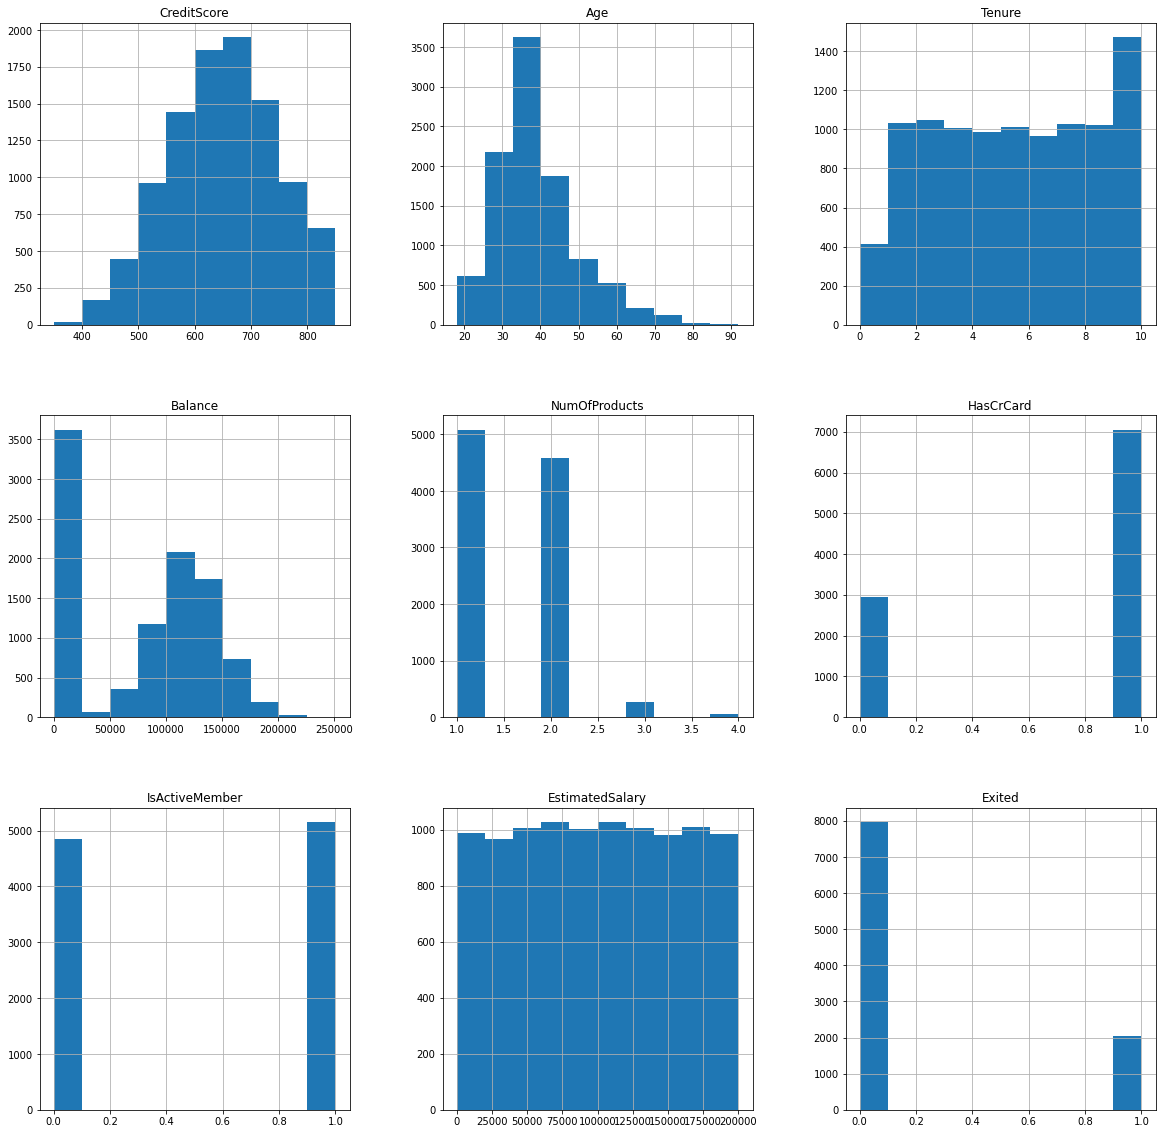

In [117]:
# performing univariant analysis by generating histogram of all dimensions
DF.hist(figsize = [20,20])

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/__init__.py:61: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


CreditScore         AxesSubplot(0.125,0.125;0.227941x0.755)
Tenure           AxesSubplot(0.398529,0.125;0.227941x0.755)
NumOfProducts    AxesSubplot(0.672059,0.125;0.227941x0.755)
dtype: object

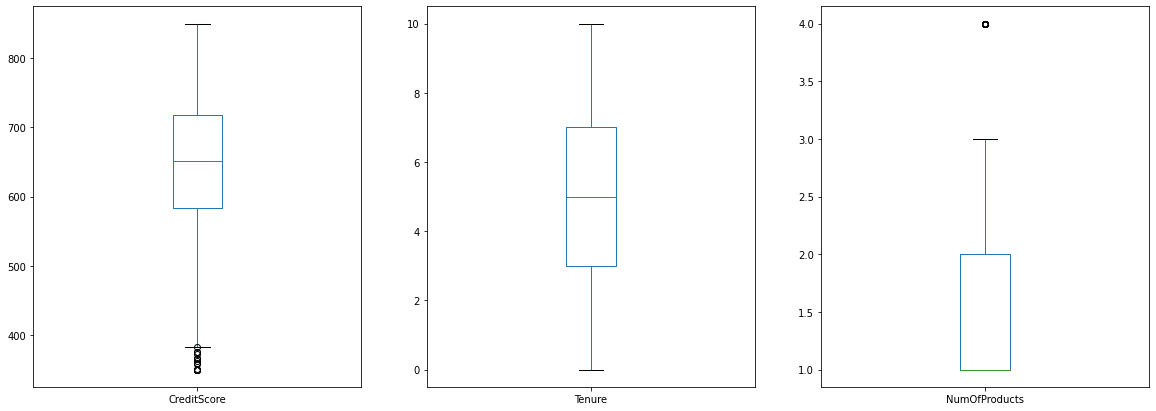

In [118]:
# plotting box plots for independent feature(features with numerical values) to check the outliers
fig, ax = plt.subplots(figsize=(20,7))
DF.iloc[:,[0,1,2,4,6]].plot(kind="box",subplots = True, ax=ax)

#### Distinguish the features and target variable

In [119]:
# The Feature Sets are entire dataset excluding Exited
# The Target Set is Exited column
X= DF.iloc[:,0:10]
y= DF.iloc[:,-1]


In [120]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [121]:
#deal with categorical data --> encode them
from sklearn.preprocessing import LabelEncoder
labelencoder_x = LabelEncoder()
X.iloc[:, 1] = labelencoder_x.fit_transform(X.iloc[:, 1]) #applying on Geography
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,Female,42,2,0.00,1,1,1,101348.88
1,608,2,Female,41,1,83807.86,1,0,1,112542.58
2,502,0,Female,42,8,159660.80,3,1,0,113931.57
3,699,0,Female,39,1,0.00,2,0,0,93826.63
4,850,2,Female,43,2,125510.82,1,1,1,79084.10


In [122]:
#apply encoder on Gender as well
labelencoder_x_2 = LabelEncoder()
X.iloc[:, 2] = labelencoder_x_2.fit_transform(X.iloc[:, 2]) #applying on Gender
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


In [123]:
### One hot encoding.
# from keras.utils import to_categorical encoded = pd.DataFrame(to_categorical(X.iloc[:, 1]))

# no need to encode Gender, as there are only two categories¶
# X = pd.concat([encoded, X], axis = 1) X.head()

In [124]:

y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

#### Dividing the data set into Train and test sets

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(8000, 10)
(2000, 10)
(8000,)
(2000,)


#### Normalize the train and test data

In [126]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


#### Initialize & build the model

In [127]:

model =  tf.keras.models.Sequential()
#seed=50
#np.random.seed(seed)
model.add(tf.keras.layers.Dense(input_dim=10, activation='relu',units=6,kernel_initializer='uniform',name='fc1'))
model.add(tf.keras.layers.Dense(kernel_initializer='uniform',units=6, activation='relu',name='fc2'))
model.add(tf.keras.layers.Dense(activation = 'sigmoid', units=1, kernel_initializer='uniform',name='output'))

In [128]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
fc1 (Dense)                  (None, 6)                 66        
_________________________________________________________________
fc2 (Dense)                  (None, 6)                 42        
_________________________________________________________________
output (Dense)               (None, 1)                 7         
Total params: 115
Trainable params: 115
Non-trainable params: 0
_________________________________________________________________


In [129]:
model.fit(X_train, y_train,validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
250/250 [==============================] - 0s 2ms/step - loss: 0.5851 - accuracy: 0.7951 - val_loss: 0.4509 - val_accuracy: 0.7975
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4382 - accuracy: 0.7972 - val_loss: 0.4290 - val_accuracy: 0.8150
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4275 - accuracy: 0.8170 - val_loss: 0.4209 - val_accuracy: 0.8320
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4214 - accuracy: 0.8241 - val_loss: 0.4147 - val_accuracy: 0.8340
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4166 - accuracy: 0.8240 - val_loss: 0.4100 - val_accuracy: 0.8360
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4125 - accuracy: 0.8240 - val_loss: 0.4060 - val_accuracy: 0.8355
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4091 - accuracy: 0.8267 - val_loss: 0.4015 - val_accuracy: 0.8355

In [130]:
#### Optimize the model

In [131]:
model1 =  tf.keras.models.Sequential()
seed=50
np.random.seed(seed)
model1.add(tf.keras.layers.Dense(input_dim=10, activation='relu',units=6,kernel_initializer='uniform',name='fc1'))
model1.add(tf.keras.layers.BatchNormalization())
model1.add(tf.keras.layers.Dense(kernel_initializer='uniform',units=6, activation='relu',name='fc2'))
model1.add(tf.keras.layers.Dense(activation = 'sigmoid', units=1, kernel_initializer='uniform',name='output'))


In [132]:
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.03)
model1.compile(loss='binary_crossentropy',optimizer=sgd_optimizer,metrics=['accuracy'])

model1.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
fc1 (Dense)                  (None, 6)                 66        
_________________________________________________________________
batch_normalization_2 (Batch (None, 6)                 24        
_________________________________________________________________
fc2 (Dense)                  (None, 6)                 42        
_________________________________________________________________
output (Dense)               (None, 1)                 7         
Total params: 139
Trainable params: 127
Non-trainable params: 12
_________________________________________________________________


In [133]:
model1.fit(X_train, y_train,validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
250/250 [==============================] - 0s 2ms/step - loss: 0.5601 - accuracy: 0.7952 - val_loss: 0.5124 - val_accuracy: 0.7975
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.5031 - accuracy: 0.7960 - val_loss: 0.4940 - val_accuracy: 0.7975
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4803 - accuracy: 0.7960 - val_loss: 0.4617 - val_accuracy: 0.7975
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4524 - accuracy: 0.7960 - val_loss: 0.4337 - val_accuracy: 0.7975
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4290 - accuracy: 0.7972 - val_loss: 0.4101 - val_accuracy: 0.7975
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4065 - accuracy: 0.8141 - val_loss: 0.3826 - val_accuracy: 0.8400
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3887 - accuracy: 0.8338 - val_loss: 0.3726 - val_accuracy: 0.8535

In [134]:
#### Predict the results using 0.5 as a threshold

#### Predict the results using 0.5 as a threshold

In [135]:
predict=model1.predict(X_test)
print(predict)

[[0.17583498]
 [0.3431279 ]
 [0.19019371]
 ...
 [0.07174632]
 [0.196208  ]
 [0.24223354]]


In [136]:
predict=predict>0.5
print(predict)


[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]


In [137]:
#### Print the Accuracy score and confusion matrix

#### Printing the Accuracy score and Confusion Matrix

In [138]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
cm = confusion_matrix(y_test, predict)
print(cm)


print("Recall:",recall_score(y_test,predict))
print()
print("Precision:",precision_score(y_test,predict))
print()
print("F1 Score:",f1_score(y_test,predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,predict))


[[1510   85]
 [ 190  215]]
Recall: 0.5308641975308642

Precision: 0.7166666666666667

F1 Score: 0.6099290780141844

Roc Auc Score: 0.7387863307403538


#### Precision we got here around 0.75
#### Recall is 0.48
#### F1 SCORE IS AROUND 0.592
#### ROC AUC Score is 0.72

In [139]:
results = model1.evaluate(X_test, y_test)

63/63 [==============================] - 0s 793us/step - loss: 0.3388 - accuracy: 0.8625


In [140]:
print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))


Final test set loss: 0.338828
Final test set accuracy: 0.862500


In [141]:
print (((cm[0][0]+cm[1][1])*100)/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0]), '% of testing data was classified correctly')


86.25 % of testing data was classified correctly


In [142]:
#Store the accuracy results for each model in a dataframe for final comparison

resultsDf = pd.DataFrame({'Method':['Keras'], 'accuracy': results[1]})

resultsDf = resultsDf[['Method', 'accuracy']]

resultsDf

,Method,accuracy
0,Keras,0.8625


#### Finally we can say that Our Model Accuracy is 86.35 % which is pretty good in order to predict whether the customer will leave Associated Bank or not

#### Lets Check with Other Different Models

In [143]:
from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ClassificationReport, ROCAUC

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [144]:
y_predict = logreg.predict(X_test)

In [145]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Trainig accuracy 0.8085

Testing accuracy 0.807

Confusion Matrix


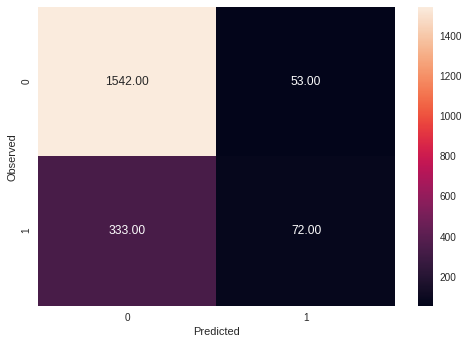

None

Recall: 0.17777777777777778

Precision: 0.576

F1 Score: 0.27169811320754716

Roc Auc Score: 0.5722744688261929


In [146]:
print("Trainig accuracy",logreg.score(X_train,y_train))  
print()
print("Testing accuracy",logreg.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

In [147]:
acc_LR = logreg.score(X_train,y_train)

In [150]:
tempResultsDf = pd.DataFrame({'Method':['Logistic Regression'], 'accuracy': [acc_LR]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Keras,0.8625
0,Logistic Regression,0.8085


In [151]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(X_train, y_train)

In [152]:
pred_RF = rfcl.predict(X_test)
acc_RF = accuracy_score(y_test, pred_RF)

In [153]:
tempResultsDf = pd.DataFrame({'Method':['Random Forest'], 'accuracy': [acc_RF]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Keras,0.8625
0,Logistic Regression,0.8085
0,Random Forest,0.8660


In [154]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators = 100, learning_rate=0.1, random_state=22)
abcl = abcl.fit(X_train, y_train)

In [155]:
pred_AB =abcl.predict(X_test)
acc_AB = accuracy_score(y_test, pred_AB)

In [156]:
tempResultsDf = pd.DataFrame({'Method':['Adaboost'], 'accuracy': [acc_AB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Keras,0.8625
0,Logistic Regression,0.8085
0,Random Forest,0.8660
0,Adaboost,0.8560


In [157]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22)
bgcl = bgcl.fit(X_train, y_train)

In [158]:
pred_BG = bgcl.predict(X_test)
acc_BG = accuracy_score(y_test, pred_BG)

In [159]:
tempResultsDf = pd.DataFrame({'Method':['Bagging'], 'accuracy': [acc_BG]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Keras,0.8625
0,Logistic Regression,0.8085
0,Random Forest,0.8660
0,Adaboost,0.8560
0,Bagging,0.8580


In [160]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22)
gbcl = gbcl.fit(X_train, y_train)

In [161]:
pred_GB = gbcl.predict(X_test)
acc_GB = accuracy_score(y_test, pred_GB)

In [162]:
tempResultsDf = pd.DataFrame({'Method':['Gradient Boost'], 'accuracy': [acc_GB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Keras,0.8625
0,Logistic Regression,0.8085
0,Random Forest,0.8660
0,Adaboost,0.8560
0,Bagging,0.8580
0,Gradient Boost,0.8625


#### Finally we can say that Keras Model Accuracy is 86.35 % which is pretty good in order to predict whether the customer will leave Associated Bank or not.
#### With Comparing Other Models Keras Model Perform better with Accuracy 86.35%